In [1]:
import numpy as np 
import pandas  as pd 

In [29]:
df = pd.read_csv(r"C:\Users\shray\Desktop\datasets\uber.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [31]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean for numerical columns
df['dropoff_longitude'] = imputer.fit_transform(df[['fare_amount']])

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean for numerical columns
df['dropoff_latitude'] = imputer.fit_transform(df[['fare_amount']])

In [34]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
df['timestamp'] = pd.to_datetime(df['pickup_datetime'])

# Extract useful features from the timestamp
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

In [36]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,timestamp,hour,day,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,7.5,7.5,1,2015-05-07 19:52:06+00:00,19,3,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,7.7,7.7,1,2009-07-17 20:04:56+00:00,20,4,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,12.9,12.9,1,2009-08-24 21:45:00+00:00,21,0,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,5.3,5.3,3,2009-06-26 08:22:21+00:00,8,4,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,16.0,16.0,5,2014-08-28 17:47:00+00:00,17,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,3.0,3.0,1,2012-10-28 10:49:00+00:00,10,6,10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,7.5,7.5,1,2014-03-14 01:09:00+00:00,1,4,3
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,30.9,30.9,2,2009-06-29 00:42:00+00:00,0,0,6
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,14.5,14.5,1,2015-05-20 14:56:25+00:00,14,2,5


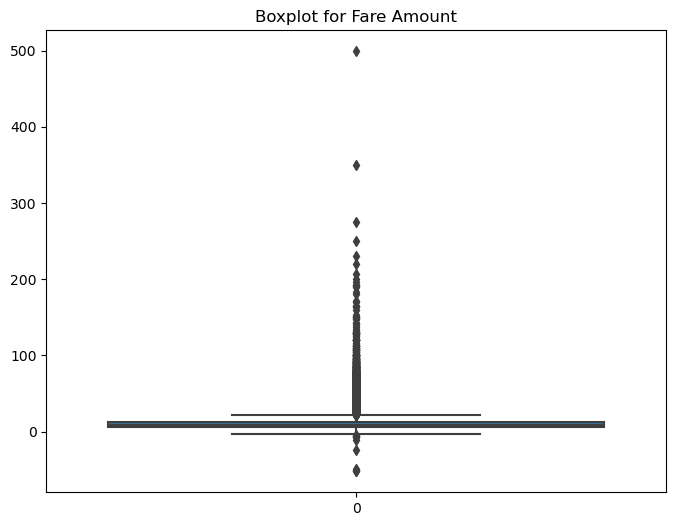

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(df['fare_amount'])
plt.title('Boxplot for Fare Amount')
plt.show()

C:\Users\shray\AppData\Local\Temp\ipykernel_21156\202691892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


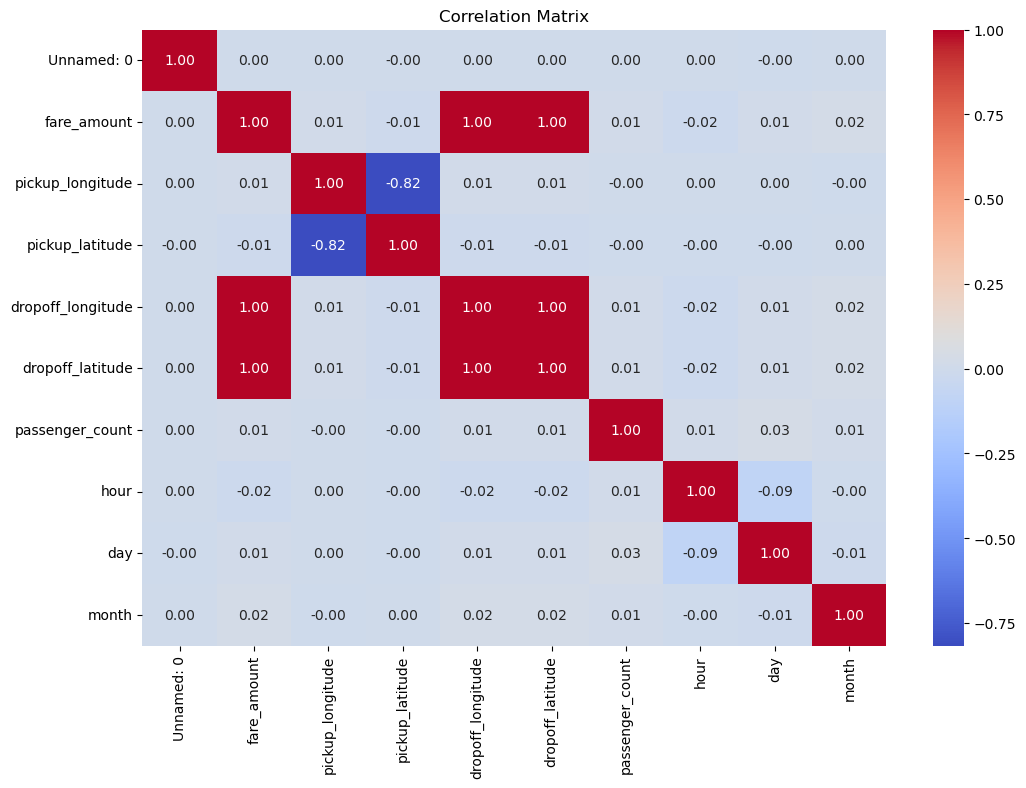

fare_amount          1.000000
dropoff_longitude    1.000000
dropoff_latitude     1.000000
month                0.023814
pickup_longitude     0.010457
passenger_count      0.010150
day                  0.007501
Unnamed: 0           0.000589
pickup_latitude     -0.008481
hour                -0.021473
Name: fare_amount, dtype: float64


In [38]:
corr_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Check the correlation with the target variable (fare_amount)
print(corr_matrix['fare_amount'].sort_values(ascending=False))

In [39]:
d=['Unnamed: 0','pickup_datetime','timestamp','key']

df=df.drop(d,axis=1)

In [40]:
from sklearn.model_selection import train_test_split

# Selecting features (X) and target variable (y)
X = df.drop(columns=['fare_amount'])  # Drop target and timestamp (non-predictive)
y = df['fare_amount']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int64  
 7   day                200000 non-null  int64  
 8   month              200000 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 13.7 MB


In [42]:
df=df.drop('key',axis=1)

KeyError: "['key'] not found in axis"

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression R^2: {r2_lr}')


Linear Regression RMSE: 3.1756370184482644e-14
Linear Regression R^2: 1.0


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R^2: {r2_rf}')


Random Forest RMSE: 1.1915527361838627
Random Forest R^2: 0.9866461215560078
